# Building the Lab Notebook Database

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

import pymupdf
import pandas as pd
from langchain_community.document_loaders import PyMuPDFLoader

import subprocess
import os
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain_community.document_loaders import PyPDFLoader
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
import chromadb

import os
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings

import os
import time
import psutil
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings

from BRAD import llms
llms.load_openai()

Enter your Open AI API key:  ········


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x152ddfec7590>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x152deec6e090>, model_name='gpt-3.5-turbo-0125', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='')

In [41]:
# Path to your PDF directory
pdf_directory = "/nfs/turbo/umms-indikar/shared/projects/RAG/papers/Digital_Library_18_Sep_2024/"

# Initialize the text splitter for chunking
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

# List to store all documents
all_documents = []

# Initialize embeddings using OpenAI
embeddings = OpenAIEmbeddings()

# Function to log resource usage
def log_resource_usage(process, document_name):
    mem_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=None)
    
    return {
        'document': document_name,
        'memory_usage_MB': mem_info.rss / 1024 ** 2,  # in MB
        'cpu_percent': cpu_percent
    }

# Track process information
process = psutil.Process(os.getpid())

# Dictionary to store resource usage per document
resource_log = []

# Load and chunk PDFs with resource tracking
for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith(".pdf"):
        # Create the full path to the PDF
        pdf_path = os.path.join(pdf_directory, pdf_file)
        
        # Start timing
        start_time = time.time()
        
        # Load the PDF using PyMuPDFLoader
        loader = PyMuPDFLoader(pdf_path)
        documents = loader.load_and_split(text_splitter)
        
        # Append to all_documents list
        all_documents.extend(documents)
        
        # End timing
        end_time = time.time()
        
        # Log time and resource usage
        elapsed_time = end_time - start_time
        resource_usage = log_resource_usage(process, pdf_file)
        resource_usage['time_seconds'] = elapsed_time
        
        # Append the log to the resource log list
        resource_log.append(resource_usage)
        
        print(f"Processed {pdf_file} in {elapsed_time:.2f} seconds with {resource_usage['memory_usage_MB']:.2f} MB memory and {resource_usage['cpu_percent']:.2f}% CPU usage.")
        

Processed epigenetic memory in the context of nuclear reprogramming and cancer.pdf in 0.05 seconds with 887.54 MB memory and 0.00% CPU usage.
Processed effective graph resistance.pdf in 0.05 seconds with 887.54 MB memory and 95.20% CPU usage.
Processed the laplacian of a hypergraph.pdf in 0.01 seconds with 887.54 MB memory and 170.30% CPU usage.
Processed hardy’s “small” discovery remembered.pdf in 0.03 seconds with 887.54 MB memory and 76.80% CPU usage.
Processed generative hypergraph clustering from blockmodels to modularity.pdf in 0.10 seconds with 887.54 MB memory and 84.00% CPU usage.
Processed synchronization in complex oscillator networks and smart grids.pdf in 0.05 seconds with 887.55 MB memory and 96.50% CPU usage.
Processed universal resilience patterns in complex networks.pdf in 0.23 seconds with 887.55 MB memory and 100.60% CPU usage.
Processed cell fate determination by transcription factors.pdf in 0.03 seconds with 887.55 MB memory and 72.70% CPU usage.
Processed a theory

In [43]:
df2 = pd.DataFrame(resource_log)
df2

,document,memory_usage_MB,cpu_percent,time_seconds
0,epigenetic memory in the context of nuclear re...,887.542969,0.0,0.047227
1,effective graph resistance.pdf,887.542969,95.2,0.052161
2,the laplacian of a hypergraph.pdf,887.542969,170.3,0.005666
3,hardy’s “small” discovery remembered.pdf,887.542969,76.8,0.025870
4,generative hypergraph clustering from blockmod...,887.542969,84.0,0.095083
...,...,...,...,...
514,umap uniform manifold approximation and projec...,1114.894531,96.0,0.478801
515,integrating microarray-based spatial transcrip...,1114.894531,94.4,0.497686
516,long-term association of a transcription facto...,1115.074219,73.4,0.122239
517,string v11 protein–protein association network...,1115.128906,22.0,0.135841


In [63]:
# Create FAISS vectorstore from the chunks
vectorstore = FAISS.from_documents(all_documents, embeddings)


In [45]:
df

,Titles,Pages,Meta
0,OP-BFGP130011 164..173,10,"{'format': 'PDF 1.3', 'title': 'OP-BFGP130011 ..."
1,Effective graph resistance,16,"{'format': 'PDF 1.3', 'title': 'Effective grap..."
2,page1.eps,16,"{'format': 'PDF 1.4', 'title': 'page1.eps', 'a..."
3,,3,"{'format': 'PDF 1.4', 'title': '', 'author': '..."
4,,31,"{'format': 'PDF 1.5', 'title': '', 'author': '..."
...,...,...,...
514,,51,"{'format': 'PDF 1.5', 'title': '', 'author': '..."
515,Integrating microarray-based spatial transcrip...,16,"{'format': 'PDF 1.4', 'title': 'Integrating mi..."
516,Long-term association of a transcription facto...,10,"{'format': 'PDF 1.4', 'title': 'Long-term asso..."
517,,7,"{'format': 'PDF 1.4', 'title': '', 'author': '..."


In [ ]:
# Create FAISS vectorstore from the chunks
vectorstore = FAISS.from_documents(all_documents, embeddings)

# Save the vectorstore for later use
vectorstore.save_local("faiss_index")

# Save resource usage log to a file for later analysis
import json
with open("resource_usage_log.json", "w") as log_file:
    json.dump(resource_log, log_file, indent=4)

print("RAG database created and saved, and resource usage logged.")


In [37]:
# Path to your PDF directory
pdf_directory = "/nfs/turbo/umms-indikar/shared/projects/RAG/papers/Digital_Library_18_Sep_2024/"

titles = []
load_times = []

# List to store all documents
all_documents = []

# Load and chunk PDFs
for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith(".pdf"):
        # Create the full path to the PDF
        pdf_path = os.path.join(pdf_directory, pdf_file)

        titles.append(pdf_file)
        start_time = time.time()
        
        # Load the PDF using PyMuPDFLoader
        loader = PyMuPDFLoader(pdf_path)
        documents = loader.load_and_split(text_splitter)

        
        
        # Append to all_documents list
        all_documents.extend(documents)


KeyboardInterrupt



In [22]:
# Now, you have all_documents as a list of text chunks from all PDFs
print(f"Loaded {len(all_documents)} document chunks.")

# Initialize embeddings using OpenAI
embeddings = OpenAIEmbeddings()

# Create FAISS vectorstore from the chunks
vectorstore = FAISS.from_documents(all_documents, embeddings)

# Save the vectorstore for later use
vectorstore.save_local("faiss_index")

print("RAG database created and saved.")


Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x152df637f4c0>
Traceback (most recent call last):
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/weakref.py", line 105, in remove
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
docsPath='/nfs/turbo/umms-indikar/shared/projects/RAG/papers/Digital_Library_18_Sep_2024/'
dbName='DigitalLibrary'
dbPath='/nfs/turbo/umms-indikar/shared/projects/RAG/databases/Digital_Library_18_Sep_2024/'
HuggingFaceEmbeddingsModel = 'BAAI/bge-base-en-v1.5'
chunk_size=[1000]
chunck_overlap=[50]
v=True

In [21]:
local = os.getcwd()  ## Get local dir
os.chdir(local)      ## shift the work dir to local dir
print('\nWork Directory: {}'.format(local))


Work Directory: /home/jpic/RAG-DEV/experimental


In [ ]:
local = os.getcwd()  ## Get local dir
os.chdir(local)      ## shift the work dir to local dir

print('\nWork Directory: {}'.format(local)) if v else None

#%% Phase 1 - Load DB
embeddings_model = HuggingFaceEmbeddings(model_name=HuggingFaceEmbeddingsModel)

print('\nDocuments loading from:', docsPath) if v else None

text_loader_kwargs={'autodetect_encoding': True}

# Digital Library Statistics

In [25]:
import os
import fitz  # PyMuPDF

# Directory containing the PDF files
pdf_directory = "/nfs/turbo/umms-indikar/shared/projects/RAG/papers/Digital_Library_18_Sep_2024/"

# Lists to store metadata
titles = []
num_pages = []
metadata_list = []

# Function to extract metadata from a PDF document
def extract_metadata(pdf_path):
    # Open the PDF document
    doc = fitz.open(pdf_path)
    
    # Extract metadata
    metadata = doc.metadata  # Get document metadata
    title = metadata.get('title', os.path.basename(pdf_path))  # Use filename as fallback title
    num_pages = doc.page_count  # Get number of pages
    
    return title, num_pages, metadata

# Loop over all PDF files in the directory
for pdf_file in os.listdir(pdf_directory):
    print(pdf_file)
    if pdf_file.endswith(".pdf"):  # Only process PDF files
        pdf_path = os.path.join(pdf_directory, pdf_file)
        
        # Extract metadata from each PDF
        title, numPgs, metadata = extract_metadata(pdf_path)
        
        # Save the metadata
        titles.append(title)
        num_pages.append(numPgs)
        metadata_list.append(metadata)

        print(f"Processed {pdf_file}: Title={title}, Pages={num_pages}")

# You can now use `titles`, `num_pages`, and `metadata_list` as needed
print("Finished processing all PDFs.")

epigenetic memory in the context of nuclear reprogramming and cancer.pdf
Processed epigenetic memory in the context of nuclear reprogramming and cancer.pdf: Title=OP-BFGP130011 164..173, Pages=[10]
effective graph resistance.pdf
Processed effective graph resistance.pdf: Title=Effective graph resistance, Pages=[10, 16]
the laplacian of a hypergraph.pdf
Processed the laplacian of a hypergraph.pdf: Title=page1.eps, Pages=[10, 16, 16]
hardy’s “small” discovery remembered.pdf
Processed hardy’s “small” discovery remembered.pdf: Title=, Pages=[10, 16, 16, 3]
generative hypergraph clustering from blockmodels to modularity.pdf
Processed generative hypergraph clustering from blockmodels to modularity.pdf: Title=, Pages=[10, 16, 16, 3, 31]
synchronization in complex oscillator networks and smart grids.pdf
Processed synchronization in complex oscillator networks and smart grids.pdf: Title=pnas201212134 2005..2010, Pages=[10, 16, 16, 3, 31, 6]
universal resilience patterns in complex networks.pdf
P

In [26]:
dbdict = {
    'Titles': titles,
    'Pages' : num_pages,
    'Meta'  : metadata_list
}
df = pd.DataFrame(dbdict)
df

,Titles,Pages,Meta
0,OP-BFGP130011 164..173,10,"{'format': 'PDF 1.3', 'title': 'OP-BFGP130011 ..."
1,Effective graph resistance,16,"{'format': 'PDF 1.3', 'title': 'Effective grap..."
2,page1.eps,16,"{'format': 'PDF 1.4', 'title': 'page1.eps', 'a..."
3,,3,"{'format': 'PDF 1.4', 'title': '', 'author': '..."
4,,31,"{'format': 'PDF 1.5', 'title': '', 'author': '..."
...,...,...,...
514,,51,"{'format': 'PDF 1.5', 'title': '', 'author': '..."
515,Integrating microarray-based spatial transcrip...,16,"{'format': 'PDF 1.4', 'title': 'Integrating mi..."
516,Long-term association of a transcription facto...,10,"{'format': 'PDF 1.4', 'title': 'Long-term asso..."
517,,7,"{'format': 'PDF 1.4', 'title': '', 'author': '..."


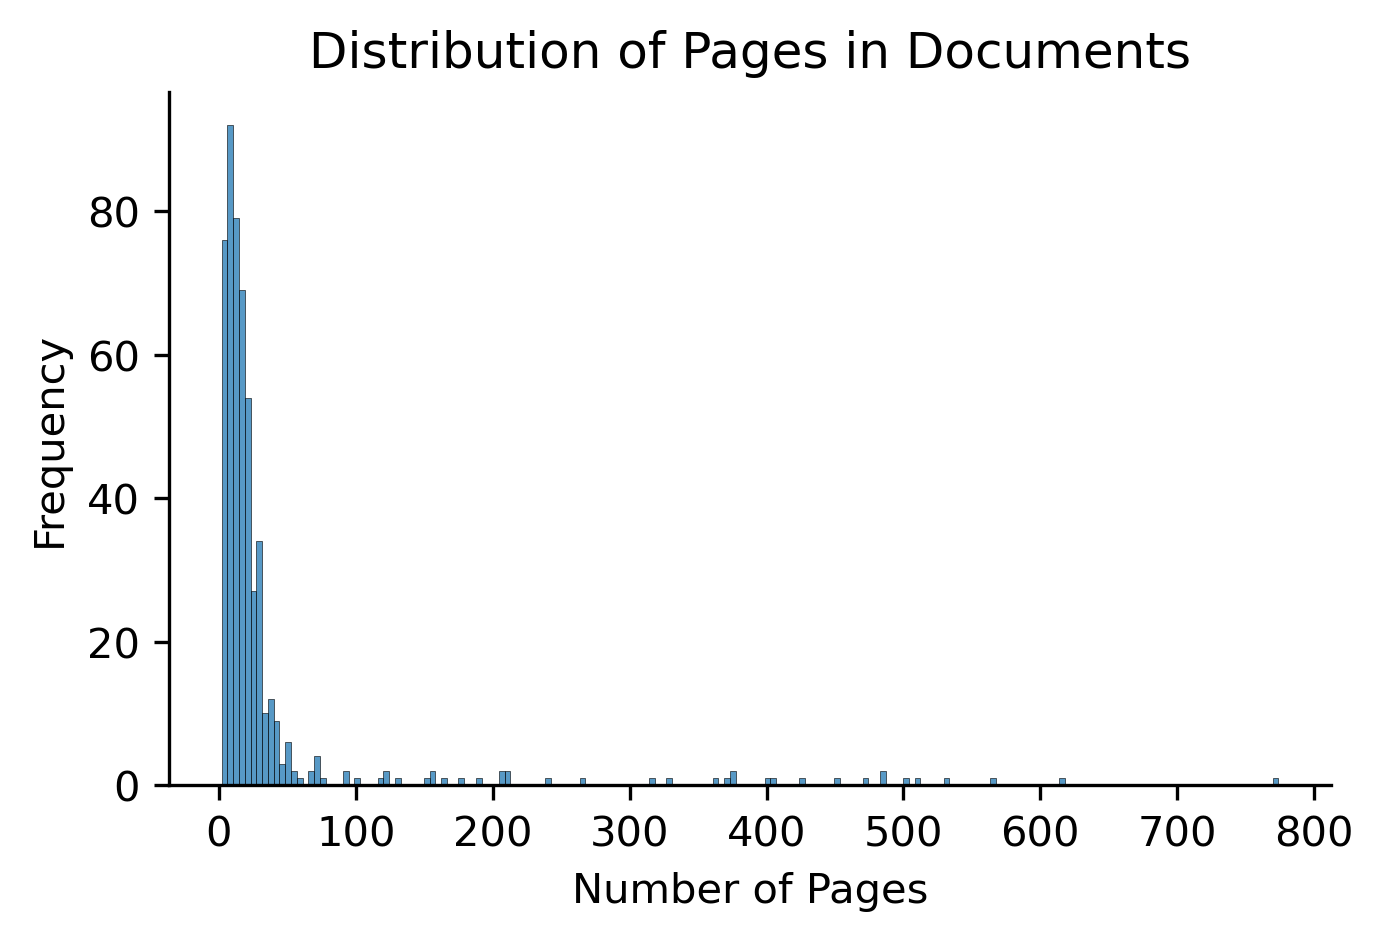

In [34]:
plt.figure(figsize=(5,3), dpi=300)
sns.histplot(data=df, x='Pages')
sns.despine()
plt.xlabel("Number of Pages")
plt.ylabel("Frequency")
# plt.xscale('log')
plt.title("Distribution of Pages in Documents")
plt.show()


In [35]:
metadata

{'format': 'PDF 1.7',
 'title': 'High-Spatial-Resolution Multi-Omics Sequencing via Deterministic Barcoding in Tissue',
 'author': 'Yang Liu',
 'subject': 'Cell, 183 (2020) 1665-1681.e18. doi:10.1016/j.cell.2020.10.026',
 'keywords': '',
 'creator': 'Elsevier',
 'producer': '',
 'creationDate': "D:20201207174818+05'30'",
 'modDate': "D:20201207175136+05'30'",
 'trapped': '',
 'encryption': None}

In [14]:
pix = page.get_pixmap()


In [15]:
pix

Pixmap(DeviceRGB, (0, 0, 612, 792), 0)